In [48]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt


In [41]:
def send_cmd(cmd):
    """Send a command and wait a bit"""
    ser.write((cmd + '\r').encode())
    time.sleep(0.1)

def query(cmd):
    """Send a command and read the response"""
    send_cmd(cmd)
    return ser.readline().decode().strip()

In [47]:
# Open serial connection
ser = serial.Serial(
    port='COM3',         # Replace with your actual port
    baudrate=9600,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_NONE,
    stopbits=serial.STOPBITS_ONE,
    timeout=2,
    xonxoff=False,
    rtscts=False,
    dsrdtr=False
)



# Reset and configure instrument
print(query('*IDN?'))
send_cmd('*RST')
send_cmd(':FORM:ELEM READ')
send_cmd('TRIG:DEL 0')
send_cmd('TRIG:COUNT 1')
send_cmd('SENS:CURR:NPLC 6')
send_cmd('SENS:CURR:RANG 0.000002')
send_cmd('SENS:CURR:RANG:AUTO ON')
send_cmd('SYST:AZER:STAT OFF')
send_cmd('DISP:ENAB ON')
send_cmd(':SYST:ZCH:STAT OFF')

# Wait for settings to take effect
time.sleep(0.5)

readings = np.zeros(500)
# Trigger a read and fetch result
for i in range(500):
    time.sleep(0.001)
    current = query('READ?')
    readings[i] = current

# Optional: close serial port when done
ser.close()


KEITHLEY INSTRUMENTS INC.,MODEL 6485,4070587,C01   Jun 23 2010 12:22:00/A02  /H


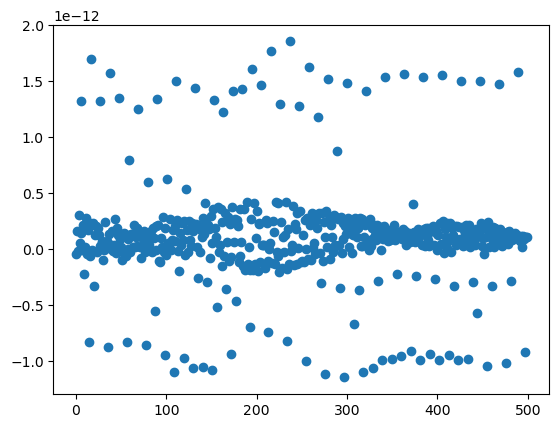

In [51]:
plt.scatter(range(500), readings)
plt.show()

In [52]:
print(np.mean(readings))

1.1468870287199999e-13
